# Importing Libraries 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_roc_curve

# Data Preprocessing and Cleaning

In [37]:
#Excel path
Excel ='D://NCI//DMML//Dataset//cardio_train.csv'
# load the data
d1=pd.read_csv(Excel ,sep=";")
d1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:>

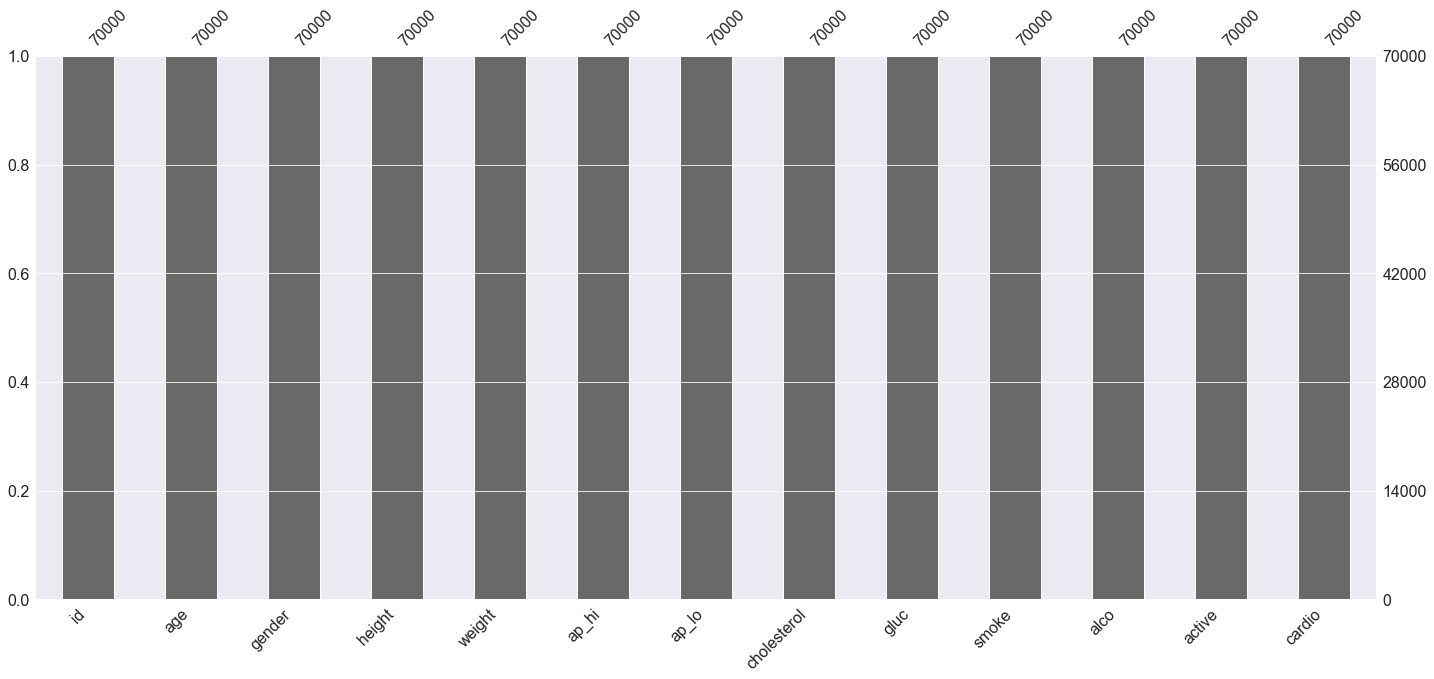

In [38]:
#Finding the missing values
msno.bar (d1)

In [39]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [40]:
d1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [41]:
# Rearranging age columns
d1 ['age']= d1['age']/365
d1['age']= d1 ['age'].astype('int')

In [42]:
d1= d1.drop(columns=['id'])

# Removing Outliers

Text(0.5, 1.0, 'Visualization of outliers')

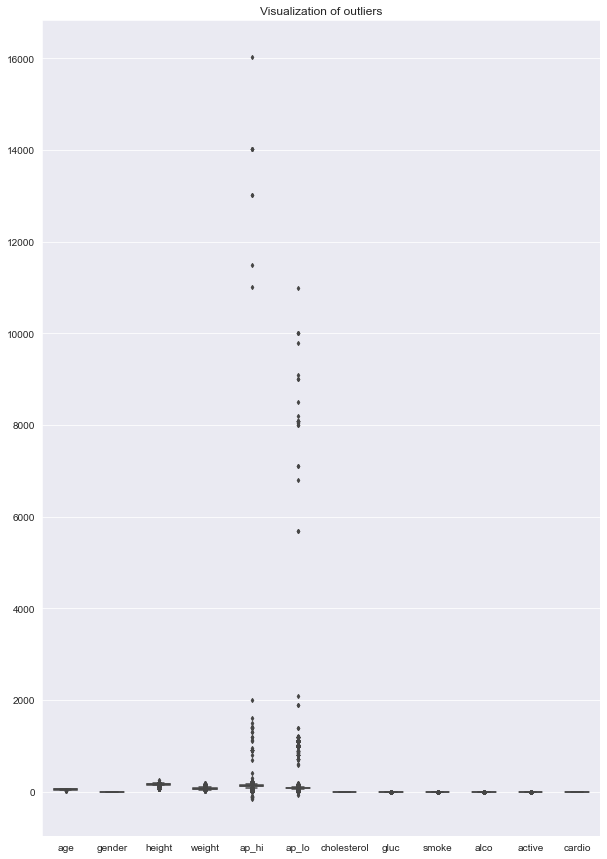

In [43]:
# Checking and removing outliers
fig, ax= plt.subplots (figsize = (10,15))
sns.boxplot (data= d1, width=0.5, ax=ax, fliersize= 3)
plt.title ("Visualization of outliers")

In [44]:
#Checking the rate of cardiovascular column with the ranging values of ap_hi and ap_lo
o= ((d1['ap_hi']>200) | (d1['ap_lo']>200) | (d1['ap_lo']<50) | (d1['ap_hi']<=80) | (d1['weight']<=28)| (d1['height']<=100) )

In [45]:
d1[o]['cardio'].count()

1448

In [46]:
d1=d1 [~o]

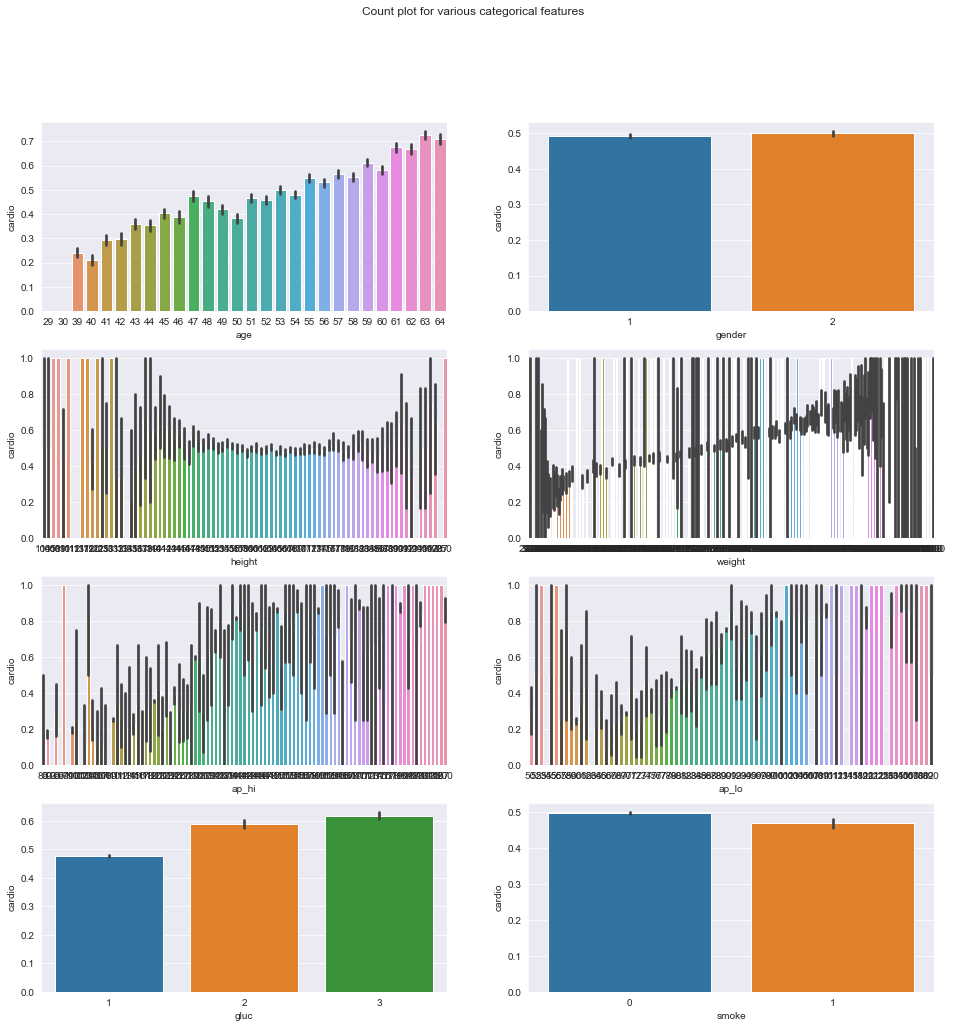

In [47]:
# checking the columns by doing visualization and counting the number of columns 
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.barplot(ax=axes[0,0],data=d1,x='age', y= 'cardio')
sns.barplot(ax=axes[0,1],data=d1,x='gender',  y= 'cardio')
sns.barplot(ax=axes[1,0],data=d1,x='height',  y= 'cardio')
sns.barplot(ax=axes[1,1],data=d1,x='weight',  y= 'cardio')
sns.barplot(ax=axes[2,0],data=d1,x='ap_hi',  y= 'cardio')
sns.barplot(ax=axes[2,1],data=d1,x='ap_lo',  y= 'cardio')
sns.barplot(ax=axes[3,0],data=d1,x='gluc',  y= 'cardio')
sns.barplot(ax=axes[3,1],data=d1,x='smoke',  y= 'cardio')

plt.show()

# Creating the Correlation and Heatmap

In [48]:
X= d1.drop (columns= ['cardio'])
y= d1 ['cardio']

<AxesSubplot:>

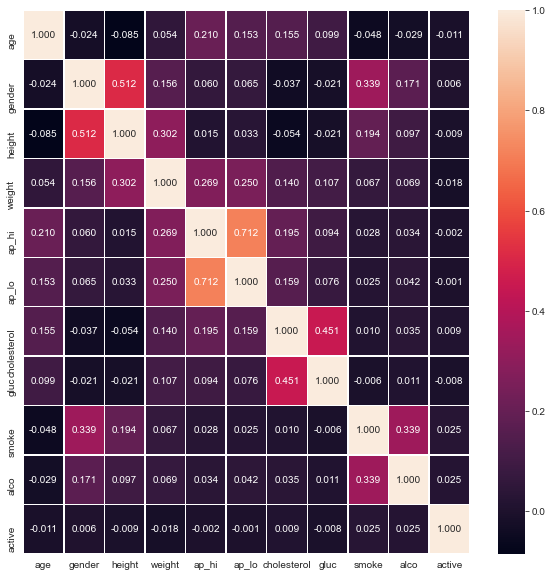

In [49]:
corr= X.corr()
f, ax= plt.subplots (figsize= (10,10))
sns.heatmap (corr, annot= True, fmt= '.3f', linewidths= 0.5, ax=ax)

In [50]:
scalar= MinMaxScaler ()
x_scaled= scalar.fit_transform (X)

# Splitting test and train dataset

In [51]:
x_train, x_test, y_train, y_test= train_test_split (x_scaled, y, test_size= 0.30)

# Defining the ML methods to be used

In [52]:
dt= DecisionTreeClassifier()
ra= RandomForestClassifier(n_estimators= 90)
knn= KNeighborsClassifier(n_neighbors=79)
svm= SVC (random_state=6)

In [53]:
models= {"Decision Tree" : dt,
         "Random forest" : ra,
         "KNN" : knn,
          "SVM": svm}
scores= {}

In [54]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [55]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.731888
KNN,0.729456
Random forest,0.710201
Decision Tree,0.635564


# ROC Curve and evualtion method values:

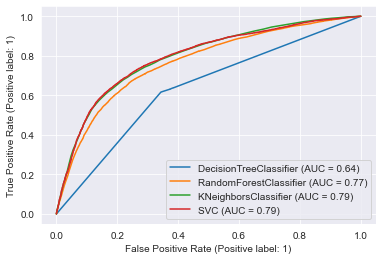

In [56]:
dis= plot_roc_curve (dt, x_test, y_test)
plot_roc_curve (ra, x_test, y_test, ax= dis.ax_)
plot_roc_curve (knn, x_test, y_test, ax=dis.ax_)
plot_roc_curve (svm, x_test, y_test, ax=dis.ax_)

In [57]:
predict_svc= svm.predict (x_test)
predict_knn= knn.predict(x_test) 

# SVC Evaluation Method:

In [58]:
conf = confusion_matrix(y_test,predict_svc)
print("The Confusion Matrix for SVC in this dataset is : \n",conf)

The Confusion Matrix for SVC in this dataset is : 
 [[8291 2152]
 [3362 6761]]


In [59]:
true_positive = conf[0][0]
false_positive = conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]

In [60]:
Precision = true_positive/(true_positive+false_positive)
Recall= true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this SVC dataset is : ",F1_Score)
print("The precision of this SVC model is : ",Precision)
print("The Recall score of SVC model is : ",Recall)

The F1_Score for this SVC dataset is :  0.7504525706010139
The precision of this SVC model is :  0.7939289476204155
The Recall score of SVC model is :  0.7114906032781259


# KNN Evaluation Method

In [61]:
conf_mat = confusion_matrix(y_test,predict_knn)
print("The Confusion Matrix for KNN in this dataset is : \n",conf_mat)

The Confusion Matrix for KNN in this dataset is : 
 [[7995 2448]
 [3116 7007]]


In [62]:
accuracy=accuracy_score(y_test,predict_knn)
print("The accuracy of knn model is : ",accuracy)

The accuracy of knn model is :  0.729456384323641


In [63]:
true_positive = conf[0][0]
false_positive = conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]


In [64]:
Precision = true_positive/(true_positive+false_positive)
Recall= true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this KNN dataset is : ",F1_Score)
print("The Recall score of KNN model is : ",Recall)
print("The precision of this KNN model is : ",Precision)

The F1_Score for this KNN dataset is :  0.7504525706010139
The Recall score of KNN model is :  0.7114906032781259
The precision of this KNN model is :  0.7939289476204155
